Fields
* ACCIDENTDATE --> DATE OF THE COLLISION
* ROADSEGMENTID	--> UNIQUE ID FOR ROADSEGMENT
* LOCATION	--> ASSOCIATED ROADSEGMENT THAT COLLISION OCCURRED ALONG
* ACCIDENT_LOCATION	--> DESCRIPTION OF ACCIDENT LOCATION
* IMPACT_LOCATION	--> DESCRIPTION OF IMPACT LOCATION
* ENVIRONMENT_CONDITION	--> WEATHER CONDITIONS AT TIME OF COLLISION
* LIGHT	--> LIGHT CONDITIONS AT THE TIME OF COLLISION
* SOURCE_DATE	--> DATE OF THE SOURCE OF THE INFORMATION OR DOCUMENT
* SOURCE	--> SOURCE OF THE INFORMATION
* COLLISION_TYPE	--> INTERSECTION OR MID-BLOCK

In [2]:
import contextily as ctx

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Traffic_Collisions.csv')

In [3]:
df['ACCIDENTDATE'] =  pd.to_datetime(df['ACCIDENTDATE'], format='%Y%m%d')

In [4]:
df = df.set_index('ACCIDENTDATE')

In [5]:
df.head()

OBJECTID ACCIDENTNUM                             LOCATION  \
ACCIDENTDATE                                                              
2013-05-25           1   13-118637  CEDAR ST N @ KING ST E / CEDAR ST S   
2013-01-24           2   13-019811           GLASGOW ST @ BELMONT AVE W   
2012-04-18           3   12-089689  CEDAR ST N @ KING ST E / CEDAR ST S   
2012-06-01           4   12-127500            BELMONT AVE W @ ARGYLE ST   
2013-01-15           5   13-012564              STRASBURG RD @ HURON RD   

                     ACCIDENT_LOCATION         IMPACT_LOCATION  \
ACCIDENTDATE                                                     
2013-05-25     02-Intersection related            02-Thru lane   
2013-01-24    04-At/near private drive            02-Thru lane   
2012-04-18         01-Non intersection       09-Right shoulder   
2012-06-01          03-At intersection  01-Within intersection   
2013-01-15          03-At intersection  01-Within intersection   

             ENVIRONMENT_CONDITION                LIGHT COLLISION_TYPE  \
ACCIDENTDATE                                                             
2013-05-25                01-Clear          01-Daylight   INTERSECTION   
2013-01-24                01-Clear          01-Daylight   INTERSECTION   
2012-04-18                01-Clear          01-Daylight   INTERSECTION   
2012-06-01                 02-Rain          01-Daylight   INTERSECTION   
2013-01-15                01-Clear  08-Dark, artificial   INTERSECTION   

              TRAFFICCOLLISIONSID  
ACCIDENTDATE                       
2013-05-25                    NaN  
2013-01-24                    NaN  
2012-04-18                    NaN  
2012-06-01                    NaN  
2013-01-15                    NaN

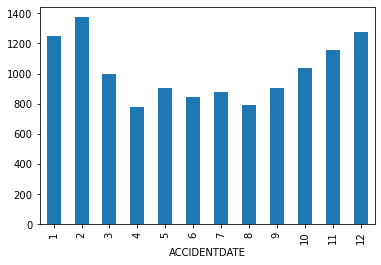

In [6]:
df.groupby(by=df.index.month)['OBJECTID'].count().plot.bar()

In [7]:
# Group by Year, Month, Weekday and see the connections --> 

# Inicio deste notebook tem boas ideias: https://github.com/GenTaylor/Traffic-Accident-Analysis/blob/master/Visualizations_and_Solution_UK_Road_Safety_Traffic_Accidents_and_Vehicles.ipynb

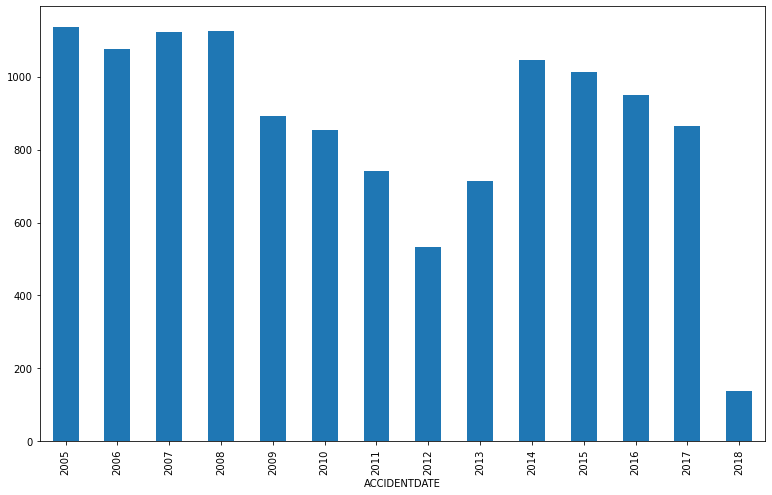

In [8]:
df.groupby(by=df.index.year).count()['OBJECTID'].plot.bar(figsize=(13,8))

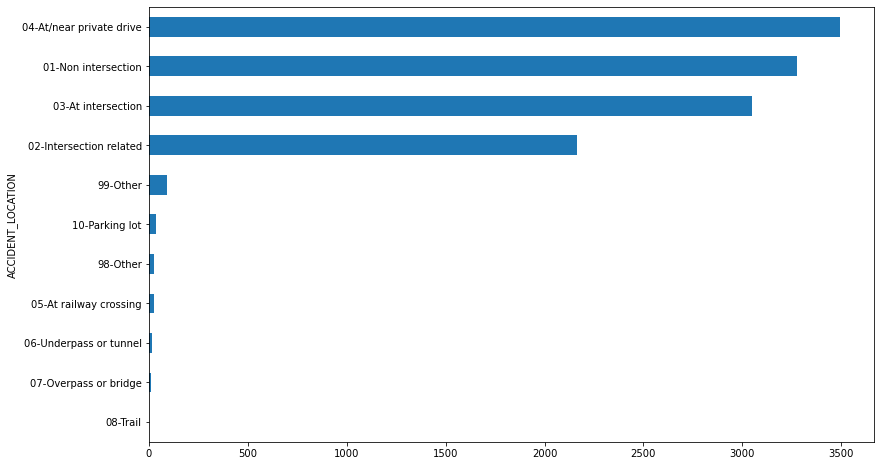

In [9]:
df.groupby('ACCIDENT_LOCATION').count()['OBJECTID'].sort_values(ascending=True).plot.barh(figsize=(13,8))

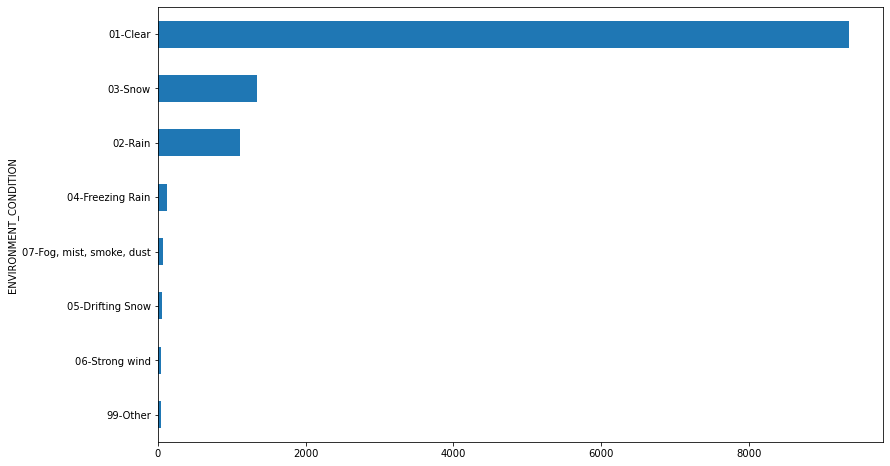

In [10]:
df.groupby('ENVIRONMENT_CONDITION').count()['OBJECTID'].sort_values(ascending=True).plot.barh(figsize=(13,8))

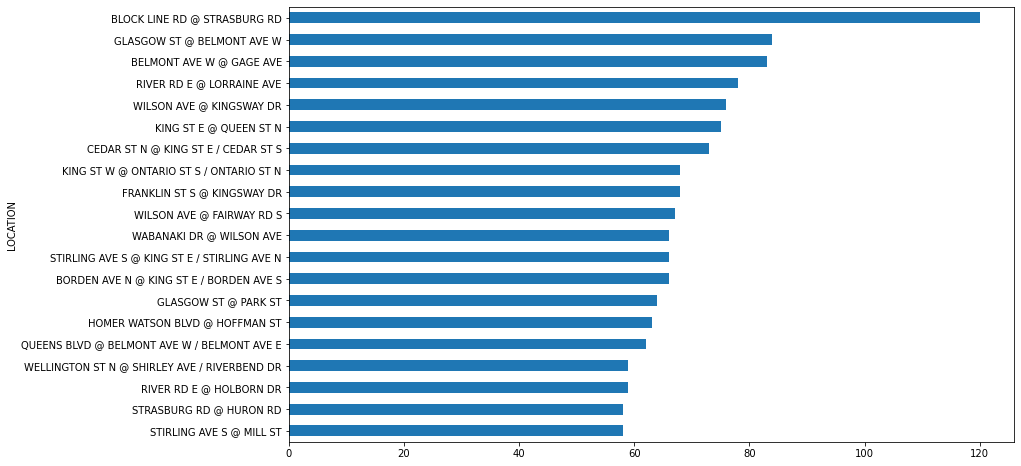

In [11]:
df.groupby('LOCATION').count()['OBJECTID'].sort_values(ascending=True).tail(20).plot.barh(figsize=(13,8))

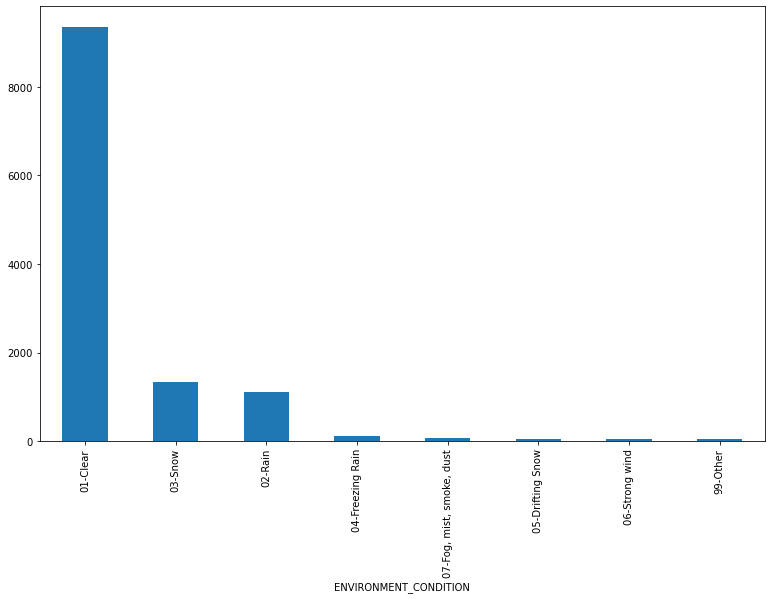

In [12]:
df.groupby('ENVIRONMENT_CONDITION').count()['OBJECTID'].sort_values(ascending=False).plot.bar(figsize=(13,8))

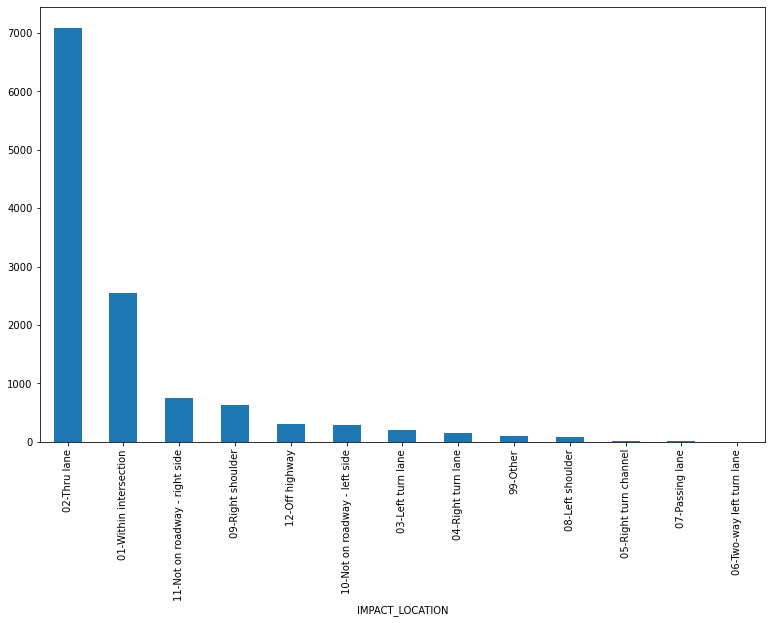

In [13]:
df.groupby('IMPACT_LOCATION').count()['OBJECTID'].sort_values(ascending=False).plot.bar(figsize=(13,8))

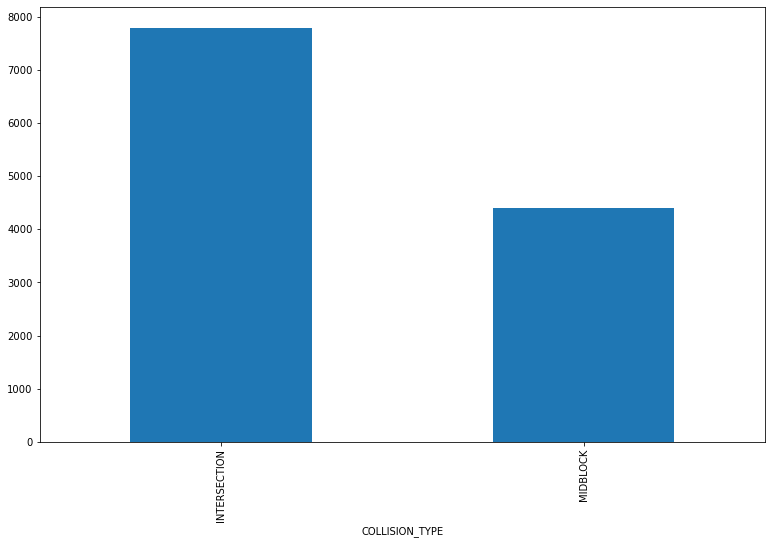

In [14]:
df.groupby('COLLISION_TYPE').count()['OBJECTID'].plot.bar(figsize=(13,8))

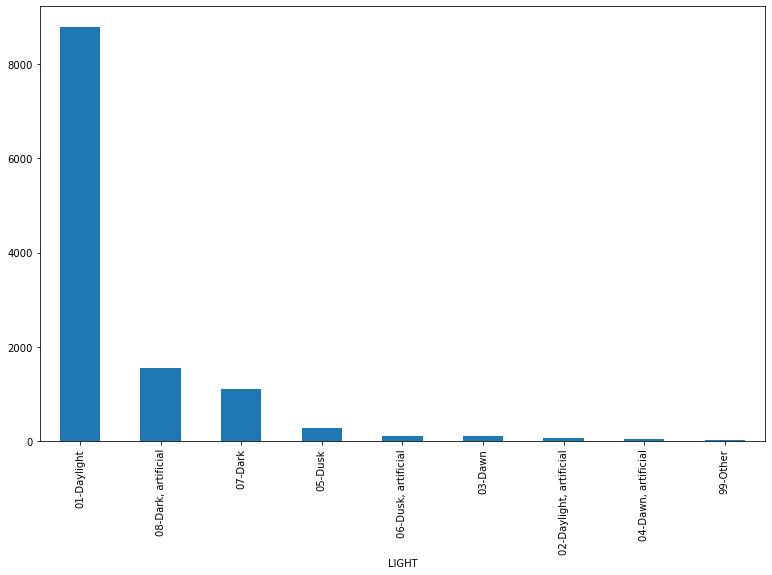

In [15]:
df.groupby('LIGHT').count()['OBJECTID'].sort_values(ascending=False).plot.bar(figsize=(13,8))

In [2]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [4]:
df_places = gpd.read_file('https://opendata.arcgis.com/datasets/75fa68b17e5b421d9d881f987c2d43fc_0.geojson')

In [5]:
df_places.head()

OBJECTID ACCIDENTNUM ACCIDENTDATE                             LOCATION  \
0         1   13-118637     20130525  CEDAR ST N @ KING ST E / CEDAR ST S   
1         2   13-019811     20130124           GLASGOW ST @ BELMONT AVE W   
2         3   12-089689     20120418  CEDAR ST N @ KING ST E / CEDAR ST S   
3         4   12-127500     20120601            BELMONT AVE W @ ARGYLE ST   
4         5   13-012564     20130115              STRASBURG RD @ HURON RD   

          ACCIDENT_LOCATION         IMPACT_LOCATION ENVIRONMENT_CONDITION  \
0   02-Intersection related            02-Thru lane              01-Clear   
1  04-At/near private drive            02-Thru lane              01-Clear   
2       01-Non intersection       09-Right shoulder              01-Clear   
3        03-At intersection  01-Within intersection               02-Rain   
4        03-At intersection  01-Within intersection              01-Clear   

                 LIGHT COLLISION_TYPE TRAFFICCOLLISIONSID  \
0          01-Daylight   INTERSECTION                None   
1          01-Daylight   INTERSECTION                None   
2          01-Daylight   INTERSECTION                None   
3          01-Daylight   INTERSECTION                None   
4  08-Dark, artificial   INTERSECTION                None   

                          geometry  
0  MULTIPOINT (-80.48344 43.44734)  
1  MULTIPOINT (-80.51699 43.45189)  
2  MULTIPOINT (-80.48344 43.44734)  
3  MULTIPOINT (-80.51844 43.45418)  
4  MULTIPOINT (-80.46622 43.39197)

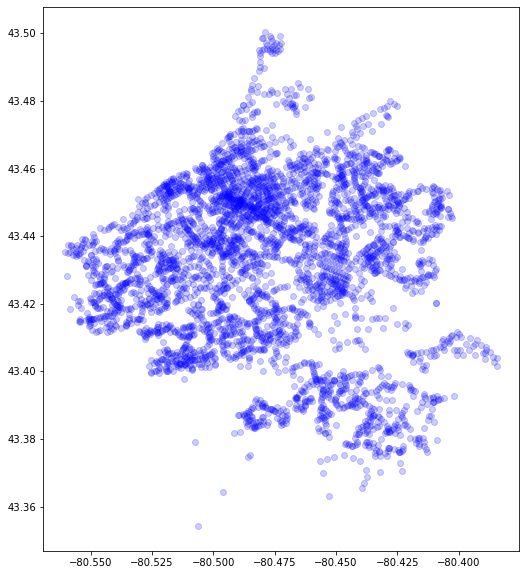

In [25]:
df_places.plot(color='blue', alpha=0.2)

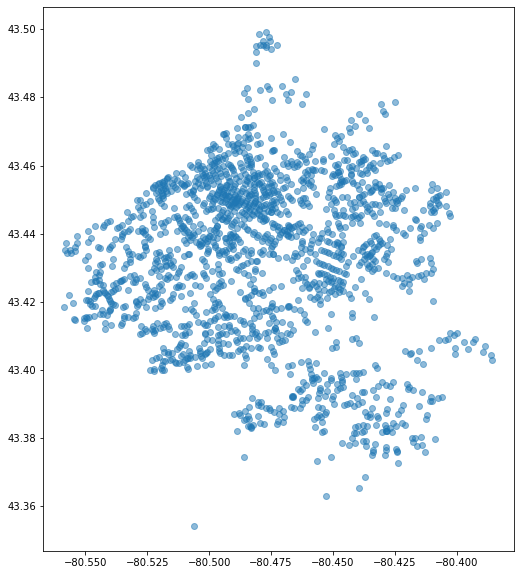

In [23]:
#fig, ax = plt.subplots(1, 1)

df_places[df_places['COLLISION_TYPE']=='INTERSECTION'].plot(alpha=0.5, legend=True)



RECOMMENDATIONS OR TASKS TO DO

* It would be cool to see at what hour of the day they happen but we do have information on what part of the day it happenned.
* Do more 'sensibilization' campaigns and have more speed controller police at the time of the year and the location there's more accidents?
* VER PERCENTAGENS DOS ACIDENTES dependendo de cada fator

* Make a Heatmap --> How to?
* Put map of Ontario on the back of the plot --> How to?
* How to create a street level model? Think.

# Problem

"Traffic collisions often result in injury, disability, death, and property damage as well as financial costs to both society and the individuals involved. Road transport is the most dangerous situation people deal with on a daily basis, but casualty figures from such incidents attract less media attention than other, less frequent types of tragedy"
 

In 2013, 54 million people worldwide sustained injuries from traffic collisions. This resulted in 1.4 million deaths in 2013, up from 1.1 million deaths in 1990.About 68,000 of these occurred in children less than five years old. Almost all high-income countries have decreasing death rates, while the majority of low-income countries have increasing death rates due to traffic collisions.

# Causes

A number of factors contribute to the risk of collisions, including vehicle design, speed of operation, road design, weather, road environment, driving skills, impairment due to alcohol or drugs, and behavior, notably aggressive driving, distracted driving, speeding and street racing.

# Solutions

# Analysis

# Recommendations 

There are numerous ways this simple solution that we built can be elevated to the next level and be even more useful and informative. One of the ways we can better our model is to treat and get more data:

* Get individual driver's data to create a risk score based on the way he drives, streets he passes, time of the day he drives,...

* Get data describing the severity of the accidents to learn which of them are more problematic, riskier and take more lives.

* Descriptors of the car (brand, model, type, age,...)

* Characteristics of the road (angle of the curves, number of cars that passes at each hour of the day, road conditions, number of radars...)

* Traffic density data (How many cars pass through the road? Can we build public transportation so that we can have less cars on the road and, consequently, less accidents?)

 This way, we could create a model that can predict accidents more accurately and, almost as important, can be more explainable so that each driver can have a safer behaviour by taking up some of the reccomendations from the model.

# Limitations 

# Further work